# CODSOFT DATA SCIENCE TASK 1(TITANIC SURVIVAL PREDICTION)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report

In [2]:
#here we write our file path
data= pd.read_csv('D:\\CODSOFT\\titanicdata.csv')
display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# handling missing values if any in data
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
data['Fare'].fillna(data['Fare'].median(),inplace=True)

In [4]:
# converting categorial vatiable to numerical using "Label Encoding"
label_encoders={}
for column in ['Sex','Embarked']:
    le = LabelEncoder()
    data[column]=le.fit_transform(data[column])
    label_encoders[column]=le

In [5]:
# selecting features and targeting values
x=data.drop(['Survived','Name','Cabin','Ticket'],axis=1)
data.drop(['Cabin'],axis=1,inplace=True)
y=data['Survived']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [6]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [7]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy :{accuracy:.2f}")


Accuracy :1.00


In [9]:
classification_rep=classification_report(y_test,y_pred)
print("Classification Report:\n",classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [10]:
class_rep=classification_report(y_test , y_pred,target_names=["Not Survived","Survived"],output_dict=True)
df_class_rep=pd.DataFrame(class_rep).transpose()

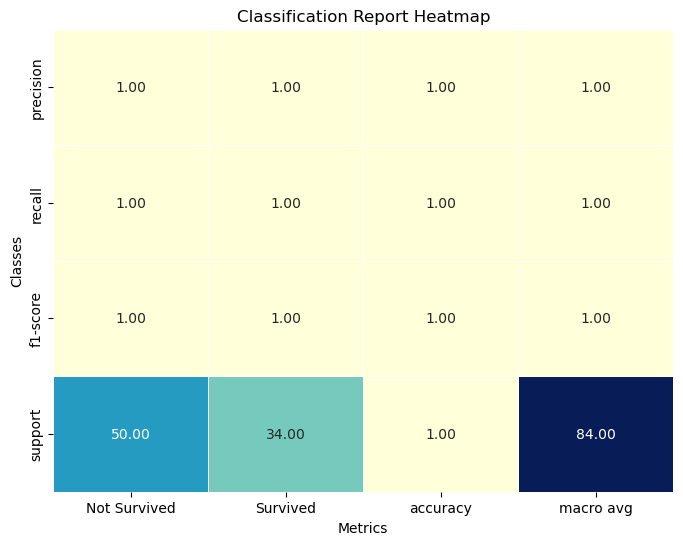

In [11]:
# now printing the data with the help of "Matplot Library"
plt.figure(figsize=(8,6))
sns.heatmap(df_class_rep.iloc[:-1,:].T,annot=True, cmap="YlGnBu" , fmt=".2f",linewidths=0.5,cbar=False)
plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()